<a href="https://colab.research.google.com/github/kripperda/MLA_KMR/blob/main/MLA4_KMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Assignment 4

---

Kory Ripperda

Imports

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount to Drive

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Connect to Google Drive

In [ ]:
# Read the file into a DataFrame named 'df'
df = pd.read_csv('/content/drive/MyDrive/banknote_authentication.csv')

Plot Confusion Matrix

In [ ]:
def plot_cm(y_true, y_pred):
    """Plots a confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

Split Data into Train/Test

In [ ]:
X = df.drop(['forgery'], axis=1)
y = df['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Build the Pipeline

In [ ]:
numerical_features = X.select_dtypes(include=['number']).columns
numerical_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', DecisionTreeClassifier())])

Execute the Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

Evaluate the Model

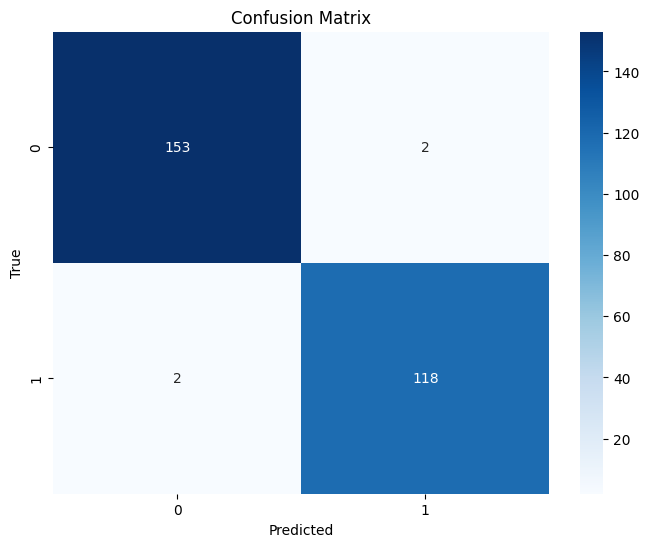

Precision: 0.9833
Recall: 0.9833
F1 Score: 0.9833


In [ ]:
y_pred = pipeline.predict(X_test)

plot_cm(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Results
The confusion matrix and the high precision, recall, and F1 score indicate that the Decision Tree Classifier performs very well on this dataset.
Precision is high, meaning that when the model predicts a banknote is a forgery, it is very likely to be correct.
Recall is also high, meaning that the model is effective at identifying most of the actual forgeries.
The F1 score, which balances precision and recall, is also high, confirming the model's overall effectiveness.
The confusion matrix visually confirms this with low false positives and false negatives.


Conclusion

The Decision Tree Classifier appears to be highly suitable for predicting banknote forgery in this dataset.
The model's high performance metrics suggest it can effectively distinguish between genuine and forged banknotes.
However, it is essential to remember that model performance can vary with different datasets and real-world scenarios.
Further testing and validation with larger and more diverse datasets would be beneficial to ensure robustness.

Decision Tree Regression

Connect to Google Drive

In [ ]:
# Path to file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/Steel_industry_data.csv')

# Rename Columns
df.rename(columns={
    'Usage_kWh': 'usage_kwh',
    'Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh',
    'Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvarh',
    'Lagging_Current_Power_Factor' : 'lag_current_pwr',
    'Leading_Current_Power_Factor' : 'lead_current_pwr',
    'NSM': 'nsm',
    'WeekStatus': 'week_status',
    'Day_of_week': 'day_of_week',
    'Load_Type': 'load_type'
}, inplace=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

               date  usage_kwh  lag_react_pwr_kvarh  lead_react_pwr_kvarh  \
0  01/01/2018 00:15       3.17                 2.95                   0.0   
1  01/01/2018 00:30       4.00                 4.46                   0.0   
2  01/01/2018 00:45       3.24                 3.28                   0.0   
3  01/01/2018 01:00       3.31                 3.56                   0.0   
4  01/01/2018 01:15       3.82                 4.50                   0.0   

   CO2(tCO2)  lag_current_pwr  lead_current_pwr   nsm week_status day_of_week  \
0        0.0            73.21             100.0   900     Weekday      Monday   
1        0.0            66.77             100.0  1800     Weekday      Monday   
2        0.0            70.28             100.0  2700     Weekday      Monday   
3        0.0            68.09             100.0  3600     Weekday      Monday   
4        0.0            64.72             100.0  4500     Weekday      Monday   

    load_type  
0  Light_Load  
1  Light_Load  
2 

Split Data into Train/Test

In [ ]:
X = df.drop(['date', 'usage_kwh'], axis=1)
y = df['usage_kwh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Build the Pipeline

In [ ]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

transformer = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

pipeline = Pipeline([
    ('transformer', transformer),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

Execute the Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

Evaluate the Model

In [ ]:
y_pred = pipeline.predict(X_test)

train_pred = pipeline.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 1.997788784435888e-16
RMSE Test: 1.4001089171999552


RMSE Output

The RMSE (Root Mean Squared Error) represents the standard deviation of the residuals (prediction errors).
A lower RMSE indicates a better fit of the model to the data.
The RMSE for the training data is significantly lower than the RMSE for the test data. This indicates that the model is likely overfitting the training data, meaning it's capturing noise rather than the underlying pattern.
The difference between the train and test RMSE indicates the model does not generalize well to unseen data.

Conclusion

The Decision Tree Regression model, in its current form, is not very suitable for predicting kwh usage.
The significant difference between the training and testing RMSE suggests that the model is overfitting the training data.
Decision trees are prone to overfitting, especially when they are allowed to grow deep.
To improve the model, consider techniques such as:
  - Pruning the decision tree to reduce its complexity.
  - Using cross-validation to better evaluate the model's performance.
  - Tuning the hyperparameters of the DecisionTreeRegressor (e.g., max_depth, min_samples_split).
  - Exploring other regression algorithms that might be more suitable for this type of data.
  - Feature engineering and selection to improve the signal to noise ratio.